# Linear Algebra

In [106]:
# HIDEME 
from IPython.display import IFrame
IFrame('story.html', width=1000, height=500)

In [107]:
%%javascript
$("div.input").has("div:contains('HIDEME')").hide();
var iframe_cell = $("div.cell").has("iframe");
iframe_cell.find("div.prompt").html("");

<IPython.core.display.Javascript object>

## Introduce Tensor

In [108]:
## HIDEME

import numpy as np
import matplotlib.pyplot as plt

In [109]:
## HIDEME

def show_vector( v,o = [0,0], color='k'):
    ax = plt.axes()
    ax.grid(color='#DCDCDC', linestyle='-',linewidth=1)
    ax.arrow(o[0], o[1], v[0],v[1], head_width=0.1, head_length=0.1, color=color, animated=True) 
    
def display():
    plt.xlim(-3,5)
    plt.ylim(-3,5)
    plt.show()

### Scalar

* A scalar is a single number
* Integers, real numbers, rational numbers, etc.
* We denote it with italic font: $$\it a,n,x
$$

In [110]:
# Scalar
x = 0  
x = 2
x

2

### Vector
> Vector is a point in multi-dimention (feature) space.

* A vector is a 1-D array of numbers:
$$
\it{x} 
= 
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$

* Can be real, binary, integer, etc.
* Example notation for type and size:
$$\mathbb{R}_n$$

<img src="images/vector.png" width="400px" />

In [111]:
# Vector
v0 = np.array([3,-2], dtype=np.float)
v0

array([ 3., -2.])

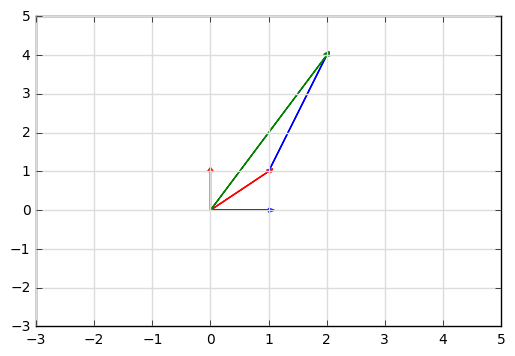

In [112]:
# Add two Vector
v1 = np.array([1,1])
v2 = np.array([1,3])
v3 = v1+v2
show_vector(v1, color='r')
show_vector(v2,v1, 'b')
show_vector(v3, color='g')
display()

### Matrix

> Matrix is a way to transform vector into different space.

> Matrix is a collection of vectors

* A matrix is a 2-D array of numbers:
$$
{A} =
\begin{bmatrix}
A_{1,1} & A_{1,2} \\
A_{2,1} & A_{2,2}
\end{bmatrix}
$$

* Example notation for type and shape:

$$
{\bf A} = \mathbb{R}^{m\times n}
$$

In [113]:
# Matrix
M = np.array([v1,v2])
M

array([[1, 1],
       [1, 3]])

In [114]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

### From basis vector to any matrix
Below shows how to form matrix from the basis vectors $\hat{\mathbf{i}}$ and $\hat{\mathbf{j}}$ , such as $\begin{bmatrix} 
3 & 1 \\
1 & 2 
\end{bmatrix} $

In [115]:
# from Vector to Matrix
i_hat = np.array([1,0])
j_hat = np.array([0,1])
show_vector(i_hat, color='b')
show_vector(j_hat, color='r')

I= np.array([i_hat,j_hat])
print(I)

[[1 0]
 [0 1]]


In [116]:
N = np.array([3 * i_hat + j_hat, i_hat + 2 * j_hat])
print(N)

[[3 1]
 [1 2]]


**Matrix as Transformation**

Now consider matrix as the transformation piece, any vector can be perfectly described by it's basis vector (the identity matrix).

\begin{equation*}
\begin{bmatrix} 
1 & 0 \\
0 & 1 
\end{bmatrix} 
\begin{bmatrix} 
-1 \\
2
\end{bmatrix}  =
\begin{bmatrix} 
-1 \\
2
\end{bmatrix}  
\end{equation*}

In [117]:
v5 = np.array([-1,2])
N_v5 = np.dot(I, v5)
print(N_v5)

[-1  2]


Now consider the matrix as the combination of new basis vector, and it's a linear transformation of v5 via new basis vector into the new feature space.

\begin{equation*}
\begin{bmatrix} 
3 & 1 \\
1 & 2 
\end{bmatrix} 
\begin{bmatrix} 
-1 \\
2
\end{bmatrix}  =
\begin{bmatrix} 
-1 \\
3
\end{bmatrix}  
\end{equation*}


<img src="images/Transformation.gif" width="600px" /> 

In [118]:

N2= np.dot(v5,N)
N2

array([-1,  3])

### Tensor

> Tensor is a unified way of describe the points in feature space or transformation of feature space.

A tensor is an array of numbers, that may have
* zero dimensions, and be a scalar
* one dimension, and be a vector
* two dimensions, and be a matrix
* or more dimensions.

In [119]:
# Tensor
T = np.ones((2,3,2))

## Matrix Operation

###  Addition

numpy offer very convinient way of matrix/vector/scalar addition operation, including
* element-wise addition
* vector broadcasting

In [120]:
print(A)
print(I)
print(v5)

# Add two matrix
B = A + I +  v5 + 2
print(B)

[[1 2]
 [3 4]]
[[1 0]
 [0 1]]
[-1  2]
[[3 6]
 [4 9]]


### Mutiplication

> Matrix dot product can be consider as vector space transformation.

$$ C = AB \tag{2.4} $$
$$ C_i,j = \sum_k A_{i,k}B_{k,j} \tag{2.5} $$

In [121]:
print(B)
print(N)

K = np.dot(B,N) 
print(K)
K2 = B * N
print(K2)

[[3 6]
 [4 9]]
[[3 1]
 [1 2]]
[[15 15]
 [21 22]]
[[ 9  6]
 [ 4 18]]


> For matrix dimention is different than the vector dimention, it's a way to transform from one lower/higher dimention to higher/lower dimention operation. 

For below example, it's tranforming a vector from 2 dimention to 3 dimention space via two 3-dimention basis vectors.

![VectorSpaceTransformation](images/VectorSpaceTransformation.png)

In [122]:
M_dot = np.array([[1,3],[5,1],[2,5]])
v_dot = np.array([3,4])

v_transformed = np.dot(M_dot,v_dot)
print(v_transformed)

[15 19 26]


### Transpose

> Matrix transpose is used a lot for basis vector transpose.

$$
(A^T)_{i,j} = A_{j,i}
$$

> Below feature is very useful during the weight and feature dot product operation.

Consider that mathmatically the columns within matrix is considered as the transformation target basis vector. And typically a vector as a array is represented as row. So instead of $M\times v$, we use $v^T \times M^T$.

$$
(AB)^T = B^TA^T
$$

In [123]:
# Transpose
B_T = B.transpose()
print(B_T)

P0= np.dot(A,B).transpose()
print(P0)

P1 = np.dot(B_T,A.transpose())
print(P1)

[[3 4]
 [6 9]]
[[11 25]
 [24 54]]
[[11 25]
 [24 54]]


### Inversion

* Matrix Inverse
$$ A^{-1}A = I_n  \tag{2.21}$$  

* Solving a system using an inverse:

\begin{equation}
Ax=b \tag{2.22} 
\end{equation}

\begin{equation}
A^{-1}Ax = A^{-1}b \tag{2.23}
\end{equation}

\begin{equation}
I_nx=A^{-1}b \tag{2.24}
\end{equation}
 

* Numerically unstable, but useful for abstract analysis


In [124]:
# Inverse
B_Inv = np.linalg.inv(B)
B_Inv

array([[ 3.        , -2.        ],
       [-1.33333333,  1.        ]])

**Invertibility**

Matrix can’t be inverted if…
* More rows than columns
* More columns than rows
* Redundant rows/columns (“linearly dependent”, “low rank”)

In [125]:
Non_Invertable = np.array([[1,1],[1,1]])

try:
    Non_Invertable_Invert = np.linalg.inv(Non_Invertable)
except Exception as err:
    print("Ops Error! :")
    print(err)

Ops Error! :
Singular matrix


## Linear Algebra Tools

### Span and Linear Dependency

The span of a set of vectors is the set of all points obtainable by linear combinationof the original vectors.

Determining whether $Ax=b$ has a solution thus amounts to testing whether b is in the span of the columns of A. This particular span is known as thecolumnspace, or the range, of A.

A set of vectors is linearly independent if no vector in the set is a linear combination of the other vectors.

### Norm

> Functions that measure how “large” a vector is

Similar to a distance between zero and the point represented by the vector

* $f(x) = 0 \implies x=0$
* $ f(x+y) \leq f(x) + f(y)$ *(the triangle inequality)*
* $\forall \alpha \in \mathbb{R} , f(\alpha x) = |\alpha|f(x)$


* $L^p$ Norm
$$
||x||_p = \Bigg(\sum_i |x_i|^p \Bigg)^{\dfrac{1}{p}}
$$

* Most popular norm : L2 norm, p=2
* L1 norm, p=1 : $||x||_1 = \sum_i |x_i| $
* Max norm, infinite p : $||x||_\infty = \max_{i}  |x_i| $



<img src="Images\VectorNorm.png" width="200px" />

In [126]:
print(v5)
L1 = np.linalg.norm(v5,1)
print(L1)
L2 = np.linalg.norm(v5,2)
print(L2) 
z = np.sqrt(np.square(-1)+np.square(2)) 
print(z)

# v5 Tranpsose * v5
L2_other = np.sqrt(np.dot(v5.transpose(),v5))
print(L2_other)



[-1  2]
3.0
2.2360679775
2.2360679775
2.2360679775


**Special Matrices and Vectors**

* Unit Vector:
$$||x||_2 = 1 \tag{2.36}$$

* Symmetric Matrix:
$$ A = A^T \tag{2.35}$$

* Orthogonal matrix
$$ 
A^TA = AA^T = I \\
A^{-1} = A^T \tag{2.37}
$$

### Eigendecomposition

* Eigenvector and eigenvalue:
$$Av=\lambda v \tag{2.39}$$

> Eigen vectors are set of vectors stay in their span during transformation. 

To visual understand what's Eigenvector and eigenvalue, please see [3brown1blue video](https://www.youtube.com/watch?v=PFDu9oVAE-g).

<img src="images/EigenVector.gif" />

* Eigendecomposition of a diagonalizable matrix:
$$ A = Vdiag(\lambda)V^{-1} \tag{2.40} $$

> The transformation matrix is expressed in the new coordinate system via the collection of Eigenvectors as the new basis vector of transformation matrix. And diagnosis matrix is a multipication of how much scaled of the transformation in the corresponding Eigenvector as the basis vector.

* Every real symmetric matrix has a real, orthogonal eigendecomposition:
$$ A = Q \Lambda Q^T $$


For example, here is how to compute the Eigenvalue of matrix below
$$
\begin{bmatrix} 
3, 6 \\
4, 9\\
\end{bmatrix}
$$ 

Computation process as below

$$
det(\begin{bmatrix} 
3-\lambda, 6 \\
4, 9-\lambda \\
\end{bmatrix}
) = 0
$$

$$
27-12\lambda + \lambda^2 -24 = 0 \\
\lambda^2 -12\lambda + 3 =0  \\
\lambda = \frac{12 \pm  \sqrt{12^2 - 4 * 1 *3}}{2} \\
$$

In [127]:
print(B)
lambda_1 = (12 - np.sqrt(12*12-4*1*3))/2
lambda_2 = (12 + np.sqrt(12*12-4*1*3))/2
print(lambda_1,lambda_2)

eigenvalues, eigenvectors = np.linalg.eig(B)
print(eigenvalues)
print(eigenvectors)

[[3 6]
 [4 9]]
0.255437353462 11.7445626465
[  0.25543735  11.74456265]
[[-0.90937671 -0.56576746]
 [ 0.41597356 -0.82456484]]


In [128]:
B_eigencomposed = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)),np.linalg.inv(eigenvectors))
print(B_eigencomposed)
print(np.array_equal(B,B_eigencomposed))

[[ 3.  6.]
 [ 4.  9.]]
True


### Single Value Decomposition

* Similar to eigendecomposition
* More general; matrix need not be square

$$
A = UDV^T \tag{2.43}
$$

> Any matrix A can be written in the form $UDV^T$ where U and V are strictly rotations and D is a matrix that scales. So, any linear transformation can be broken down into 3 steps, i.e. rotate first, stretch/scale (not necessarily by the same amount in all directions; you could stretch the x-axis twice as much as the y-axis), and rotate again

### Moore-Penrose Pseudoinverse

$$ x =  A^+y $$

If the equation has:
* Exactly one solution: this is the same as the inverse.
* No solution: this gives us the solution with the smallest error
* Many solutions: this gives us the solution with the smallest norm of x.

**Compute**
The SVD allows the computation of the pseudoinverse:

$$
A^+= VD^+U^T \tag{2.47} \\
D^+ : \text{Take reciprocal of non-zero entries}
$$


### Trace

The trace operator gives the sum of all the diagonal entries of a matrix

$$
Tr(A) = \Sigma_i A_{i,j} \tag{2.48}
$$

$$
Tr(ABC) = Tr(BAC) = Tr(CAB) \tag{2.51}
$$

### Determinant


* The determinant of a square matrix, denoted det(A), is a function that mapsmatrices to real scalars. 
* The determinant is equal to the product of all theeigenvalues of the matrix. 
* The absolute value of the determinant can be thoughtof as a measure of how much multiplication by the matrix expands or contractsspace.


> How much change of volume 

For more visual understanding of how the Determinant means in the geometry, please see [3blue1brown video](https://www.youtube.com/watch?v=Ip3X9LOh2dk&t=4s).

<img src="images\Determinant.gif" />

### PCA



## Summary

Imaging you are walking in a very dark 3D space, you can see all the vectors as arrows in the space, with numbers, and these vectors can be transformed into different ones (matrix operations), the collection of these vectors forms the span, any vectors can be represented via other vectors they are called linear dependent. 

* Linear algebra is very useful and not boring at all if you use **geometry** to get the inituition of each concept and tools
* Vector is essensial and map to n-dimension space
* Consider matrix operation as Linear transformation 
